## Lead Scoring Case Study

#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

##### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

##### Import Data

In [6]:
user = pd.read_csv('Leads.csv')

In [7]:
pd.set_option('display.max_columns', None)

##### Check data size

In [9]:
user.shape

(9240, 37)

##### Data is having 9240 rows and 37 columns

In [11]:
# Get column information

user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
# Describing data

user.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Fields such as "Total Visits," "Total Time Spent on Website," and "Page Views Per Visit" appear to have outliers. Visualizing the data will provide clearer insights.

In [14]:
# Let's look at the data

user.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
# Checking the percentage of missing values

round(100*(user.isnull().sum()/len(user.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

## Data Cleaning

##### Some fields, such as "specialization," contain default values like "Select" which are not meaningful for analysis. These values can be converted to nulls, as they have no impact on the analysis.

In [18]:
user_data = user.replace('Select', np.nan)

In [19]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

##### Several fields contain a high percentage of null values.

In [21]:
#Dropping columns having more than 40% null values

user_data = user_data.drop(columns=user_data.columns[(round(user_data.isnull().sum() / user_data.shape[0], 2)) > 0.40])

In [22]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [23]:
user_data['City'].value_counts(normalize=True) * 100

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64

##### Since the majority of users are from Mumbai, we can impute the missing values in the "City" field with "Mumbai."

In [25]:
user_data['City']=user_data['City'].replace(np.nan,'Mumbai')

In [26]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [27]:
user_data['Specialization'].value_counts(normalize=True) * 100

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

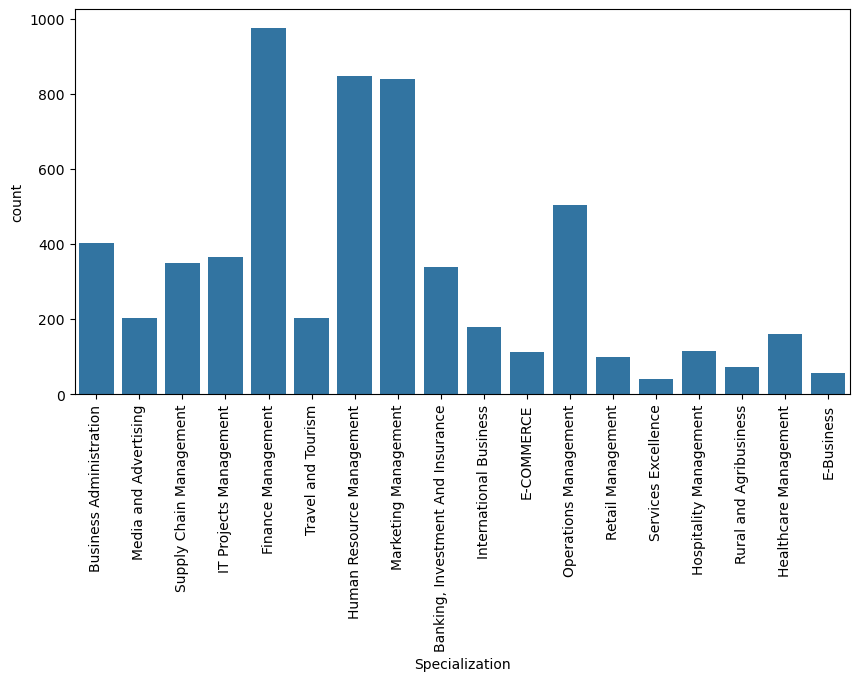

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=user_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

##### The "Specialization" column has 37% missing values. This could be because the lead is a student, lacks a specialization, or their specialization is not listed among the available options. To address this, we can create a new category labeled "Others."

In [30]:
user_data['Specialization'] = user_data['Specialization'].replace(np.nan, 'Others')

In [31]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

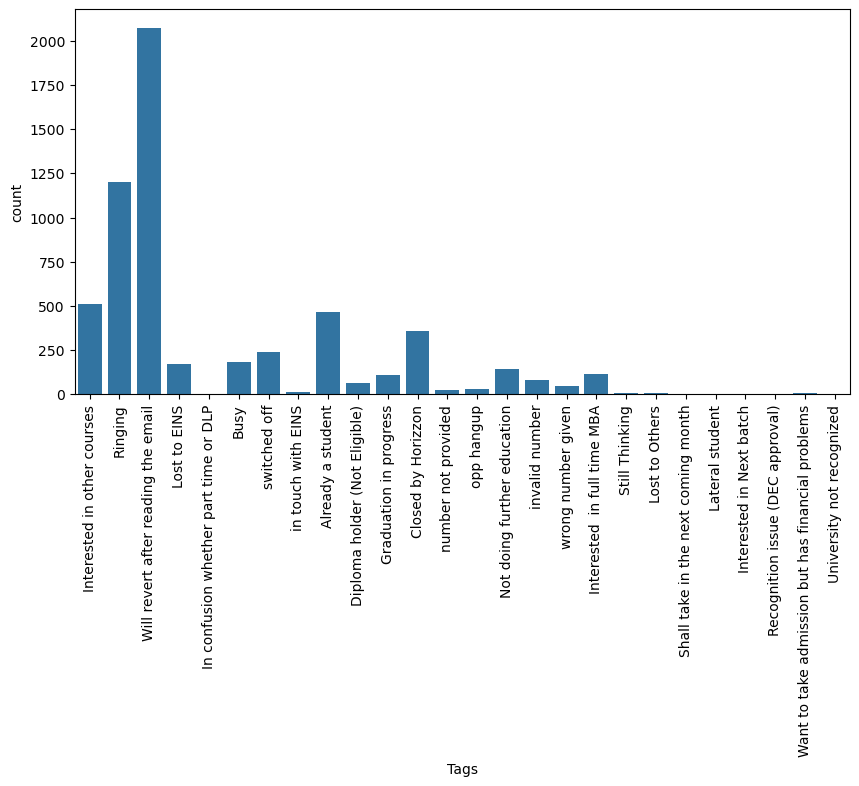

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=user_data['Tags'])
plt.xticks(rotation=90)
plt.show()

##### Majority of values in this column are "Will revert after reading the email," we can use this value to impute the missing entries.

In [34]:
user_data['Tags'] = user_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [35]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

In [36]:
user_data['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

##### The column "What matters most to you in choosing a course" has 30% missing values. We can impute these missing entries with "Not provided."

In [38]:
user_data['What matters most to you in choosing a course'] = user_data['What matters most to you in choosing a course'].replace(np.nan, 'Not Provided')

In [39]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Prospect ID                                       0.00
X Education Forums                                0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Search    

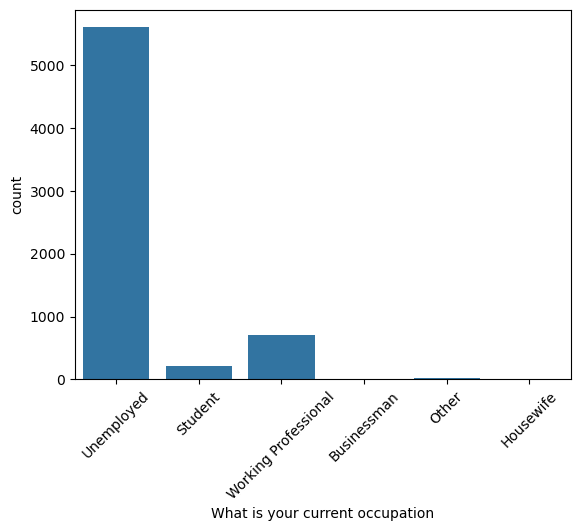

In [40]:
sns.countplot(x=user_data['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

##### Since "Unemployed" is the most frequent value in this column, we can use it to impute the missing entries.

In [42]:
user_data['What is your current occupation'] = user_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [43]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Search                                            0.00
Newspaper 

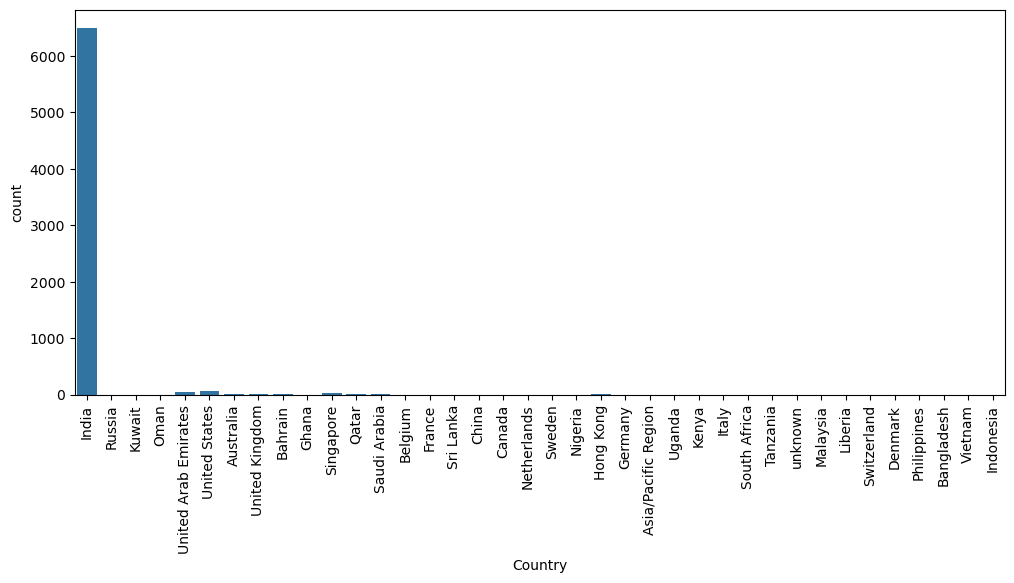

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(x=user_data['Country'])
plt.xticks(rotation=90)
plt.show()

##### Since "India" is the most common value in this column, we can use it to impute the missing entries.

In [46]:
user_data['Country'] = user_data['Country'].replace(np.nan,'India')

##### The remaining missing values account for less than 2%, so we can drop these rows.

In [48]:
user_data.dropna(inplace = True)

In [49]:
# Checking the percentage of missing values

round(100*(user_data.isnull().sum()/len(user_data.index)), 2).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

##### There are no missing values remaining in the dataset.

##### We can calculate the percentage of rows retained.

In [52]:
(len(user_data.index)/9240)*100

98.2034632034632

##### After cleaning the data, we have retained 98% of the rows.

## Exploratory Data Anaysis

In [55]:
# Check the target variable for the presence of any data imbalance

user_data['Converted'].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

##### This provides a good representation of both the converted and non-converted classes, ensuring there will be no issues with the analysis.

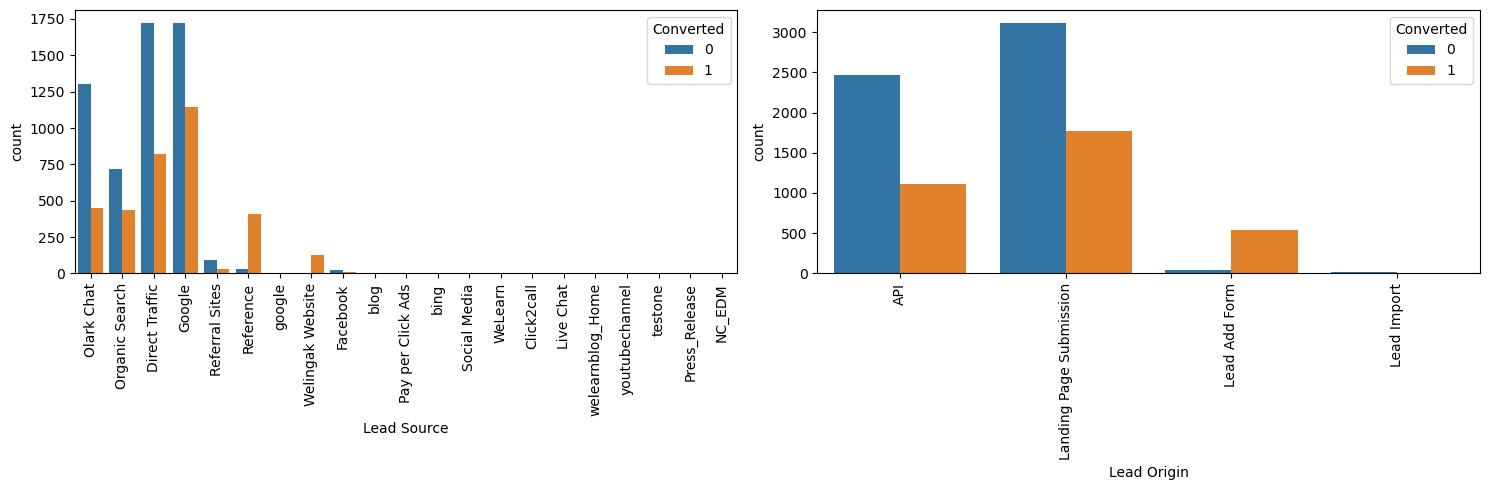

In [57]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x='Lead Source', hue='Converted', data=user_data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data=user_data)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### OBSERVATION:

The conversion rate for "API" and "Landing Page Submission" is relatively low (~30%), but the number of leads from these sources is significant. The count of leads from the "Lead Add Form" is low, though its conversion rate is very high. "Lead Import" has both a low count and low conversion rate, so it can be disregarded. To improve the overall lead conversion rate, we should focus on increasing the conversion rates for "API" and "Landing Page Submission," as well as boosting the number of leads from the "Lead Add Form."

In [59]:
# For column lead source group the negligible columns into separate other_lead_source category for better visualization and data analysis

user_data['Lead Source'] = user_data['Lead Source'].replace(['bing', 'Click2call', 'Live Chat', 'Social Media', 'Press_Release',
  'Pay per Click Ads', 'NC_EDM', 'testone', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

user_data['Lead Source'] = user_data['Lead Source'].replace("google", 'Google')

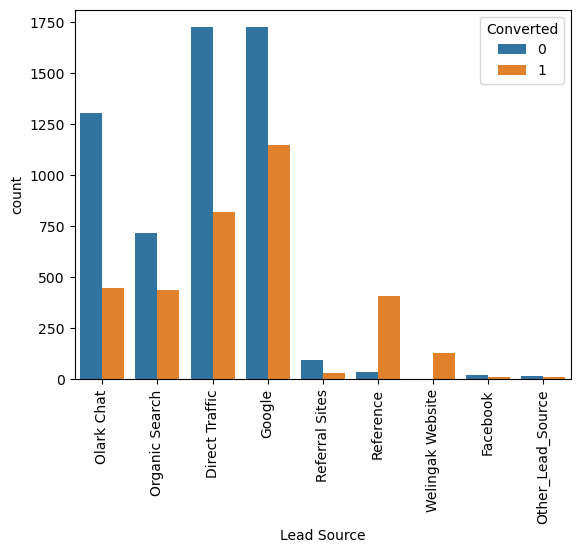

In [60]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= user_data)
plt.xticks(rotation='vertical')
plt.show()

##### OBSERVATION:

The highest number of leads comes from Google, followed by direct traffic, Olark chat, organic search, and references.

##### To improve the overall lead conversion rate, we should focus on increasing the conversion rates for "Google," "Olark Chat," "Organic Search," and "Direct Traffic." Additionally, we should work on increasing the number of leads from "Reference" and "Welingkar Website."

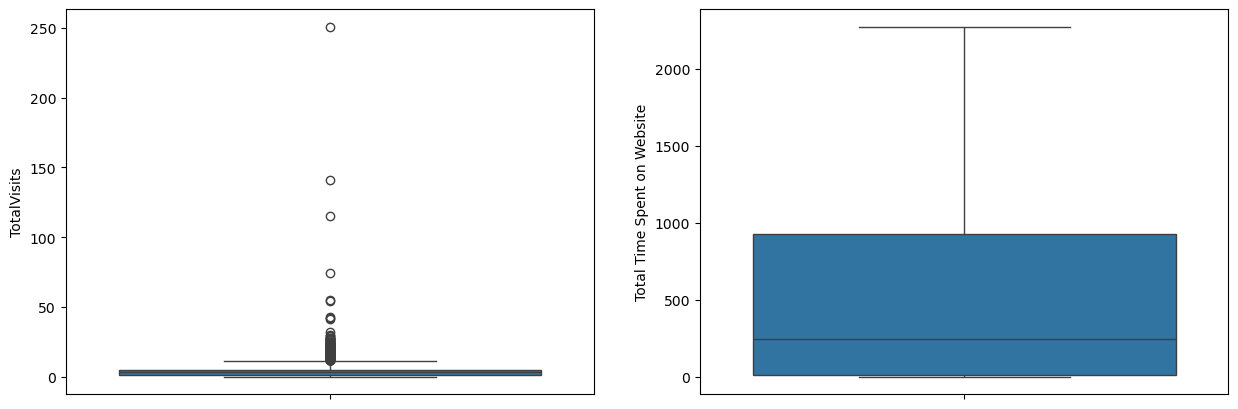

In [63]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.boxplot(user_data['TotalVisits'])

plt.subplot(1,2,2)
sns.boxplot(user_data['Total Time Spent on Website'])

plt.show()

##### OBSERVATION:

The "TotalVisits" column contains extreme outliers, while the "Total Time Spent on the Website" column appears to follow a normal distribution.

In [65]:
# The "Total Visits" column contains many outliers, and we can cap this variable at the 95th percentile to address this issue.

q1 = user_data["TotalVisits"].quantile(0.95)
user_data["TotalVisits"][user_data["TotalVisits"] >= q1] = q1

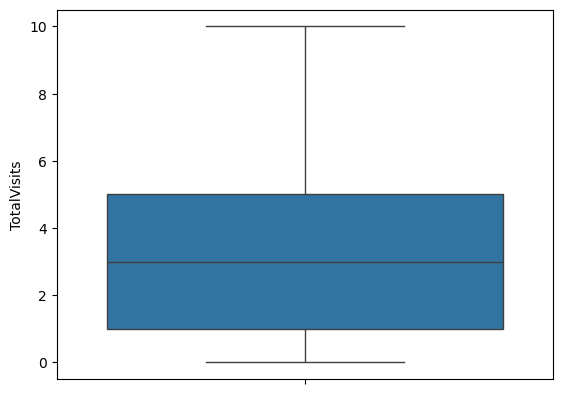

In [66]:
sns.boxplot(user_data['TotalVisits'])
plt.show()

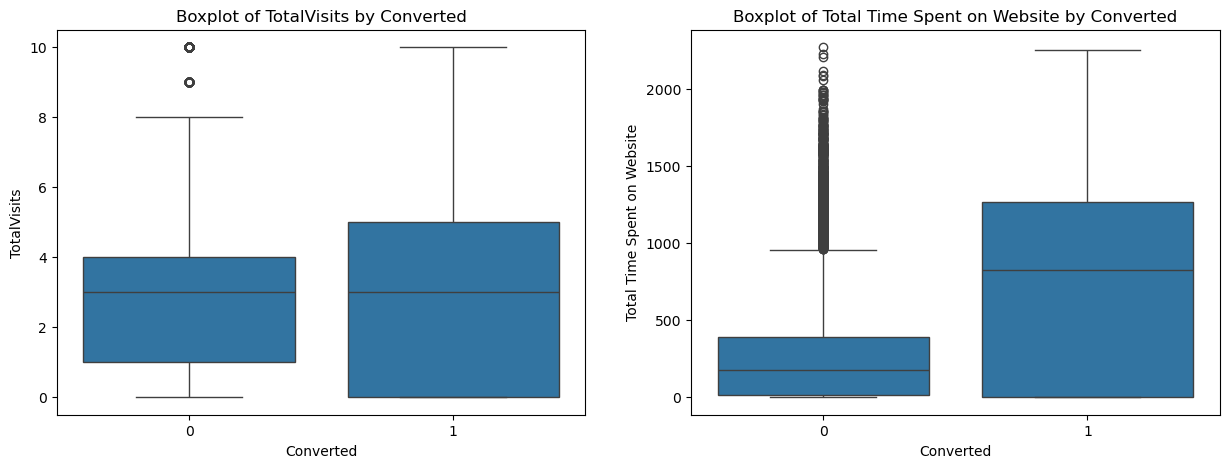

In [67]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
sns.boxplot(x="Converted", y="TotalVisits", data=user_data)
plt.title("Boxplot of TotalVisits by Converted")

# Second boxplot: Total Time Spent on Website by Converted
plt.subplot(1, 2, 2)
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=user_data)
plt.title("Boxplot of Total Time Spent on Website by Converted")
plt.show()

##### OBSERVATION:

For the "Total Visits" variable, the median values for both converted and non-converted users are similar, indicating that this variable does not offer conclusive insights regarding conversions.

However, for the "Time Spent on Website" variable, users who spend more time on the website are more likely to convert.

To improve conversions, the website can be made more engaging and appealing to encourage users to spend more time on it.

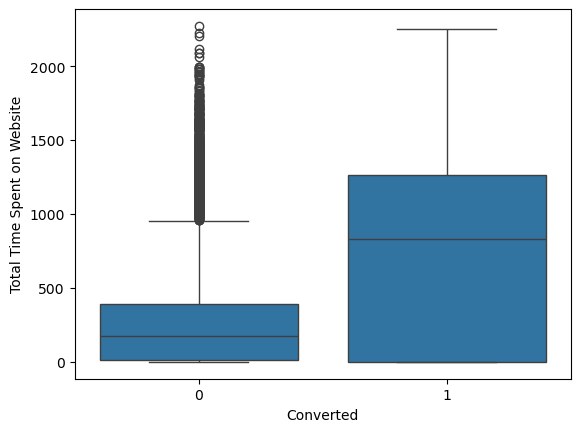

In [69]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = user_data)
plt.show()

##### Leads who spend more time on the website are more likely to be converted.

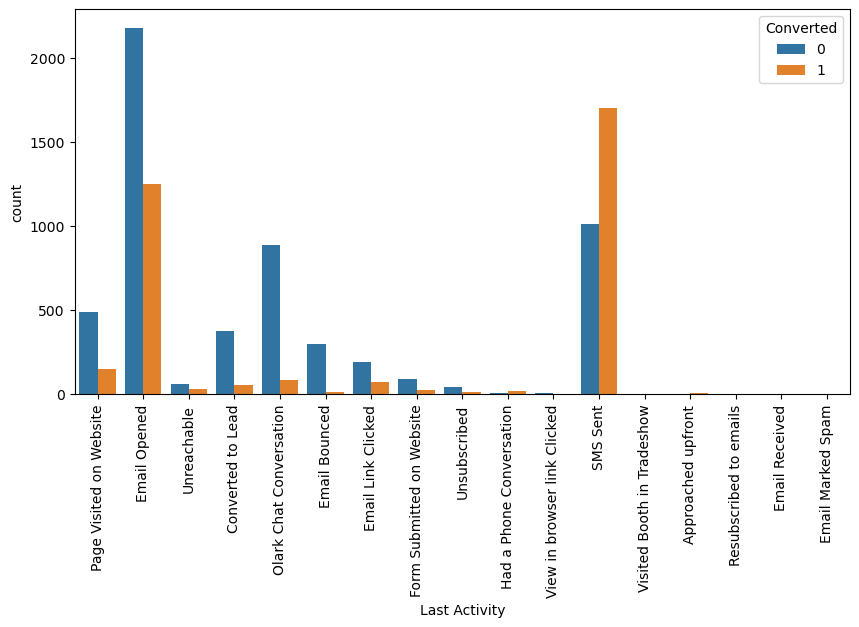

In [71]:
# Check the Last Activity 

plt.figure(figsize=(10,5))
sns.countplot(x="Last Activity", hue="Converted", data= user_data)
plt.xticks(rotation='vertical')
plt.show()

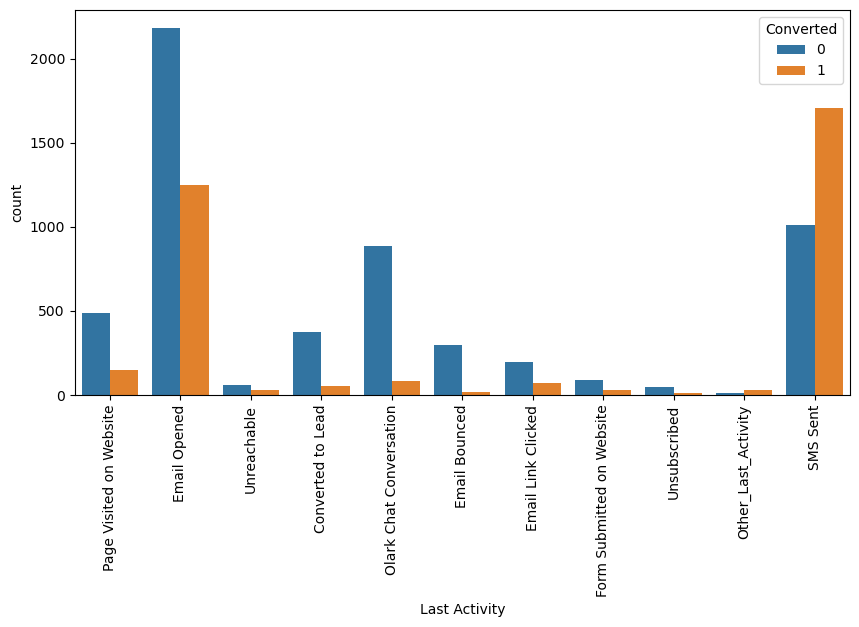

In [72]:
# Negligible categories can be combined into the "Others" category to improve visualization and analysis.

user_data['Last Activity'] = user_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Last_Activity')

# lets plot the Last Activity again 

plt.figure(figsize=(10,5))
sns.countplot(x="Last Activity", hue="Converted", data= user_data)
plt.xticks(rotation='vertical')
plt.show()

##### Inference:

Most leads have "Email Opened" as their last activity. The conversion rate for leads with "SMS Sent" as their last activity is nearly 75%.

To improve the conversion rate for leads with "Email Opened" as the last activity, follow-up calls should be initiated. Additionally, efforts should be made to increase the number of leads with "SMS Sent" as their last activity to capitalize on its high conversion potential.

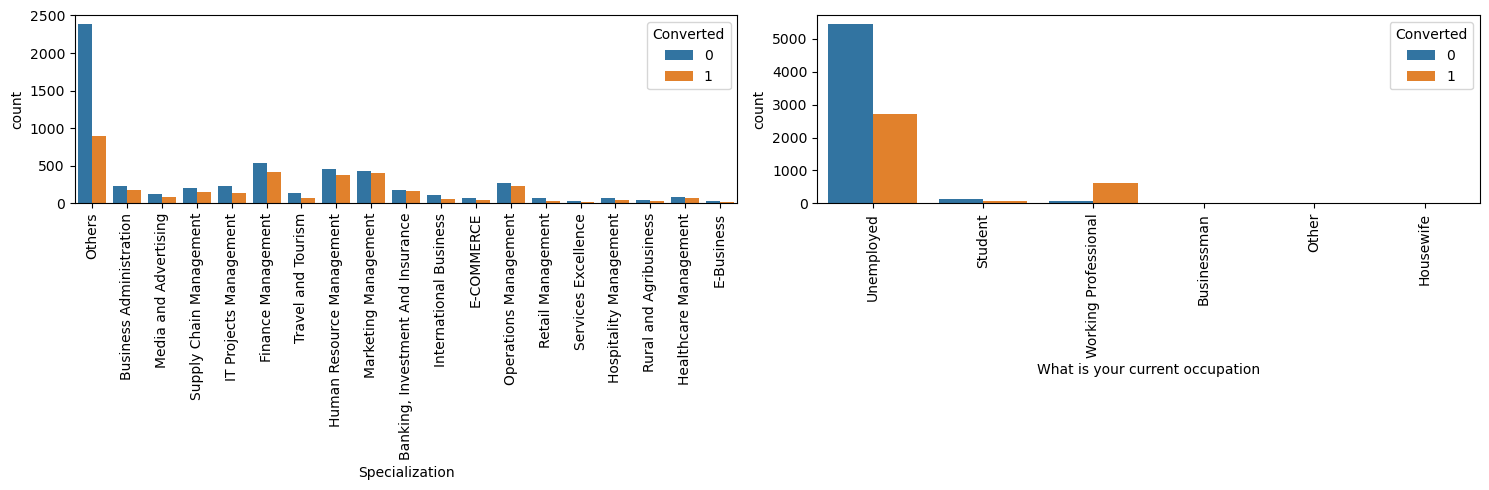

In [74]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data=user_data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=user_data)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### Inferences:

The plot above suggests that no definitive conclusions can be drawn regarding "Specialization." However, it is clear that working professionals have the highest conversion rate, while unemployed leads outnumber those from other categories.

To boost the overall conversion rate, focus on increasing the number of working professional leads by targeting platforms like LinkedIn and other social media channels. Additionally, efforts should be made to improve the conversion rate of unemployed leads.

In [76]:
user_data['What is your current occupation'] = user_data['What is your current occupation'].replace("Other", 'Other_Occupation')

In [77]:
user_data[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
           "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content",
           "I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,2,1,2,2,2,2,2,1,1,1,2
top,No,No,No,No,No,No,No,No,No,No,No
freq,9060,9074,9072,9073,9073,9070,9067,9074,9074,9074,6186


##### It is evident that the majority of values in all the columns are 0 (i.e., "No"), which makes it challenging to draw any meaningful conclusions from these columns.

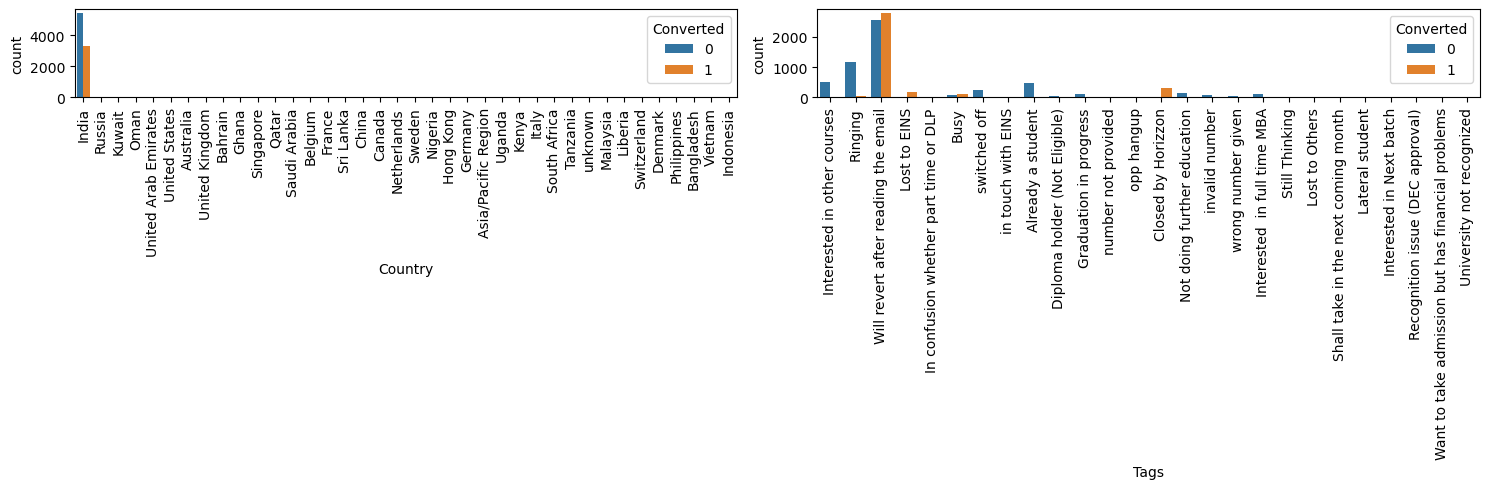

In [79]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x='Country', hue='Converted', data=user_data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Tags', hue='Converted', data=user_data)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### The "Country," "What matters most to you in choosing a course," and "City" columns have a majority of values corresponding to a single option, such as "India" for Country and "Mumbai" for City. As a result, these columns do not provide significant insights.

In [81]:
user_data['Tags'].value_counts(normalize=True)

Tags
Will revert after reading the email                  0.588825
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number not provided                                  0.002755
in 

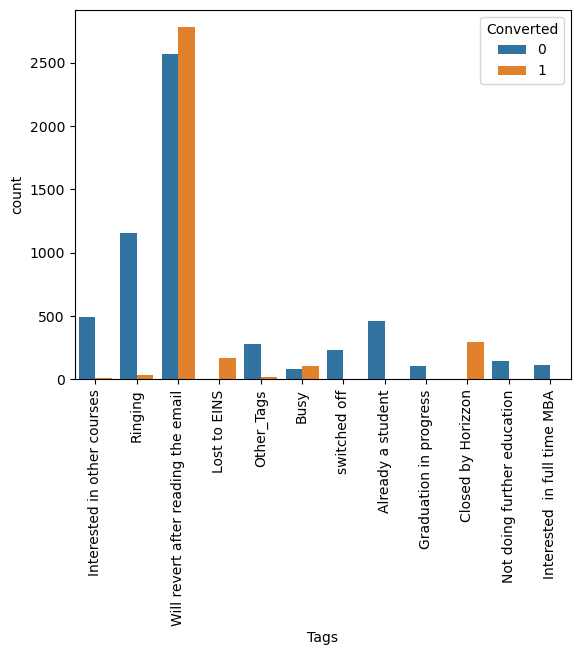

In [82]:
# Converting all low count categories to Others category

user_data['Tags']= user_data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided',                                 
                                             'in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking',
                                             'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                                             'University not recognized','Recognition issue (DEC approval)' ], 'Other_Tags')

# lets plot the Tags again

sns.countplot(x='Tags', hue='Converted', data=user_data)
plt.xticks( rotation='vertical')
plt.show()

##### "Will revert after reading the email" and "Closed by Horizzon" have high conversion rates.

##### Summary:

1. To enhance the overall lead conversion rate, we should prioritize improving the conversion rates of leads from 'API' and 'Landing Page Submission' as Lead Origins, while also increasing the number of leads from the 'Lead Add Form.'

2. To boost conversion rates, we need to focus on improving the performance of leads from 'Google,' 'Olark Chat,' 'Organic Search,' and 'Direct Traffic,' while also increasing the volume of leads from 'Reference' and 'Welingak Website.'

3. Making the website more engaging can help increase the time users spend on it, which may, in turn, improve conversions.

4. We should focus on improving the conversion rate of leads with "Email Opened" as their last activity by following up with them through calls, while also working to increase the number of leads with "SMS Sent" as their last activity.

5. To increase the overall conversion rate, we should target more Working Professional leads by engaging with them on professional platforms like LinkedIn, and also work on boosting the conversion rate of Unemployed leads.

6. We observed that several columns contain only a single value. Since these columns provide no meaningful insights, they can be removed from further analysis.

##### Based on the analysis, we have identified that many columns are not contributing any valuable information to the model. Therefore, we can drop these columns for further analysis.

In [86]:
user_data = user_data.drop(['Lead Number', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                  'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview', 'Country'], axis=1)

user_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


In [87]:
user_data.shape

(9074, 15)

In [88]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                     

## Data Preparation

In [90]:
# We can convert some binary variables (Yes/No) to 1/0 for easier analysis and modeling.

vars =  ['Do Not Email', 'Do Not Call']
user_data[vars] = user_data[vars].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [91]:
# Creating Dummy variables for the categorical values

dummy = pd.get_dummies(user_data[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation',
                                  'City','Last Notable Activity', 'Tags']], 
                       drop_first=True,
                       dtype=int)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [92]:
# Merge dummy variables to user_data

user_data = pd.concat([user_data, dummy], axis=1)
user_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0

In [93]:
# drop the original variable after creating dummies

user_data = user_data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation',
                             'City','Last Notable Activity','Prospect ID', 'Tags'], axis=1)

In [94]:
user_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [95]:
user_data.shape

(9074, 81)

#### Train Test Split

In [97]:
# Putting all the feature variables to X
X = user_data.drop(['Converted'], axis=1)

# Putting target variable to y
y = user_data['Converted']

In [98]:
print(y.head())
X.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [99]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [101]:
scaler = StandardScaler()

scal_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[scal_var] = scaler.fit_transform(X_train[scal_var])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [102]:
#Checking the Conversion Rate

print("Conversion rate is ", (sum(user_data['Converted'])/len(user_data['Converted'].index))*100)

Conversion rate is  37.85541106458012


##### Find the correlation

In [104]:
# Compute the correlation matrix
conv_corr = user_data.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Stack and sort the correlations
top_correlations = conv_corr.where(mask).stack().sort_values(ascending=False).head(10)

# Display the top correlations
print(top_correlations)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64


In [105]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked',
                      'Last Notable Activity_Page Visited on Website'], axis=1)

X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked',
                        'Last Notable Activity_Page Visited on Website'], axis=1)

In [106]:
conv_corr = X_train.corr()

In [107]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form          Lead Source_Reference                             0.859537
TotalVisits                        Page Views Per Visit                              0.756104
Do Not Email                       Last Activity_Email Bounced                       0.624939
Last Activity_Other_Last_Activity  Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat             Specialization_Others                             0.505771
Page Views Per Visit               Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form          Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced        Last Notable Activity_Email Bounced               0.450911
TotalVisits                        Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat             Last Activity_Olark Chat Conversation             0.419173
dtype: float64

##### Feature Selection Using RFE

In [109]:
#Starting with 15 features selected by RFE
#We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 37),
 ('TotalVisits', False, 52),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Other_Lead_Source', False, 41),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Form Submitted on Website', False, 49),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Other_Last_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 22),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activ

In [110]:
col = X_train.columns[rfe.support_]

In [111]:
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### Model Building

In [113]:
# Model - 1

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1920.4
Date:                Mon, 16 Dec 2024   Deviance:                       3840.8
Time:                        18:42:43   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5173
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2910      0.252     -1.157      0.247      -0.784       0.202
Do Not Email                                     -1.5862      0.212     -7.471      0.000      -2.002      -1.170
Lead Origin_Landing Page Submission              -1.5251      0.154     -9.885      0.000      -1.828      -1.223
Lead Origin_Lead Add Form                         1.4248      0.316      4.505      0.000       0.805       2.045
Lead Source_Welingak Website                      2.3599      0.796      2.966      0.003       0.801       3.919
Last Activity_Other_Last_Activity                 2.2335      0.603      3.701      0.000       1.051       3.416
Last Activity_SMS Sent                            1.9867      0.092     21.499      0.000       1.806       2.168
Last Activity_Unsubscribed                        2.1409      0.548      3.906      0.000       1.067       3.215
Specialization_Others                            -1.9182      0.156    -12.281      0.000      -2.224      -1.612
What is your current occupation_Unemployed       -2.5455      0.201    -12.684      0.000      -2.939      -2.152
Last Notable Activity_Modified                   -1.6373      0.096    -17.086      0.000      -1.825      -1.449
Last Notable Activity_Olark Chat Conversation    -1.5066      0.328     -4.590      0.000      -2.150      -0.863
Tags_Busy                                         3.5573      0.259     13.759      0.000       3.051       4.064
Tags_Closed by Horizzon                           9.4653      0.738     12.829      0.000       8.019      10.911
Tags_Lost to EINS                                 9.3765      0.746     12.574      0.000       7.915      10.838
Tags_Will revert after reading the email          4.1995      0.155     27.099      0.000       3.896       4.503
=================================================================================================================
"""

##### Checking for VIF values

In [115]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
8      What is your current occupation_Unemployed                       6.93
1             Lead Origin_Landing Page Submission                       4.32
7                           Specialization_Others                       3.51
14       Tags_Will revert after reading the email                       2.50
9                  Last Notable Activity_Modified                       1.73
2                       Lead Origin_Lead Add Form                       1.66
5                          Last Activity_SMS Sent                       1.59
3                    Lead Source_Welingak Website                       1.34
12                        Tags_Closed by Horizzon                       1.21
0                                    Do Not Email                       1.20
6                      Last Activity_Unsubscribed                       1.08
11                                      Tags_Busy                       1.08

##### All variables have low p-values, but 'What is your current occupation_Unemployed' has a high VIF value. Therefore, it should be removed from the analysis.

In [117]:
col = col.drop('What is your current occupation_Unemployed')
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [118]:
# Model - 2

# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.7
Date:                Mon, 16 Dec 2024   Deviance:                       4051.3
Time:                        18:42:43   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5010
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.4546      0.193    -12.745      0.000      -2.832      -2.077
Do Not Email                                     -1.5558      0.203     -7.672      0.000      -1.953      -1.158
Lead Origin_Landing Page Submission              -1.6117      0.151    -10.683      0.000      -1.907      -1.316
Lead Origin_Lead Add Form                         1.5833      0.315      5.034      0.000       0.967       2.200
Lead Source_Welingak Website                      2.1487      0.795      2.704      0.007       0.591       3.706
Last Activity_Other_Last_Activity                 2.4096      0.602      4.001      0.000       1.229       3.590
Last Activity_SMS Sent                            1.9109      0.089     21.376      0.000       1.736       2.086
Last Activity_Unsubscribed                        2.0761      0.520      3.989      0.000       1.056       3.096
Specialization_Others                            -2.1929      0.154    -14.257      0.000      -2.494      -1.891
Last Notable Activity_Modified                   -1.6376      0.093    -17.560      0.000      -1.820      -1.455
Last Notable Activity_Olark Chat Conversation    -1.5503      0.326     -4.755      0.000      -2.189      -0.911
Tags_Busy                                         3.3535      0.255     13.176      0.000       2.855       3.852
Tags_Closed by Horizzon                           9.3350      0.735     12.696      0.000       7.894      10.776
Tags_Lost to EINS                                 9.2079      0.742     12.406      0.000       7.753      10.663
Tags_Will revert after reading the email          4.1573      0.151     27.549      0.000       3.862       4.453
=================================================================================================================
"""

In [119]:
# Check the VIF once again

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
13       Tags_Will revert after reading the email                       2.40
1             Lead Origin_Landing Page Submission                       2.19
7                           Specialization_Others                       2.01
8                  Last Notable Activity_Modified                       1.67
2                       Lead Origin_Lead Add Form                       1.64
5                          Last Activity_SMS Sent                       1.58
3                    Lead Source_Welingak Website                       1.34
11                        Tags_Closed by Horizzon                       1.21
0                                    Do Not Email                       1.20
6                      Last Activity_Unsubscribed                       1.08
9   Last Notable Activity_Olark Chat Conversation                       1.07
10                                      Tags_Busy                       1.07

#### Since the p-values of all variables are 0 and the VIF values are low for all the variables, Model-2 is our final model. It includes 14 variables.

##### Making Prediction on the Train set

In [122]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.522745
1012    0.025145
9226    0.012442
4750    0.881004
7987    0.995570
1281    0.881004
2880    0.522745
4971    0.943205
7536    0.522745
1248    0.022032
dtype: float64

In [123]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52274474, 0.0251455 , 0.01244152, 0.88100437, 0.99556976,
       0.88100437, 0.52274474, 0.94320547, 0.52274474, 0.0220317 ])

In [124]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.522745,3009
1,0,0.025145,1012
2,0,0.012442,9226
3,1,0.881004,4750
4,1,0.995570,7987


In [125]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.522745,3009,1
1,0,0.025145,1012,0
2,0,0.012442,9226,0
3,1,0.881004,4750,1
4,1,0.995570,7987,1


In [126]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8501023460872303


In [127]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

#### Evaluating model

In [129]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3338  567]
 [ 385 2061]]
Accuracy : 0.8501023460872303
Sensitivity : 0.8426001635322976
Specificity : 0.8548015364916773
Precision : 0.7842465753424658


(0.8501023460872303,
 0.8426001635322976,
 0.8548015364916773,
 0.7842465753424658)

#### Plotting the ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False)

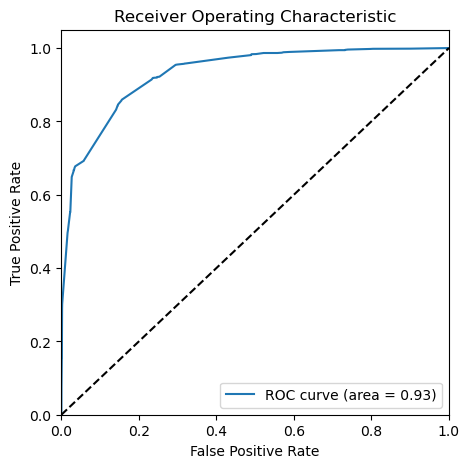

In [133]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### Find the optimal value of cutoff

In [135]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.522745,3009,1,1,1,1,1,1,1,0,0,0,0
1,0,0.025145,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.012442,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.881004,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.995570,7987,1,1,1,1,1,1,1,1,1,1,1


In [136]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.691702,0.980785,0.510627,0.556613
0.2,0.2,0.817352,0.919460,0.753393,0.700187
0.3,0.3,0.823492,0.918643,0.763892,0.709056
0.4,0.4,0.849787,0.857727,0.844814,0.775888
0.5,0.5,0.850102,0.842600,0.854802,0.784247
0.6,0.6,0.853881,0.677433,0.964405,0.922606
0.7,0.7,0.852307,0.668029,0.967734,0.928409
0.8,0.8,0.847741,0.647179,0.973367,0.938352
0.9,0.9,0.728862,0.299264,0.997951,0.989189


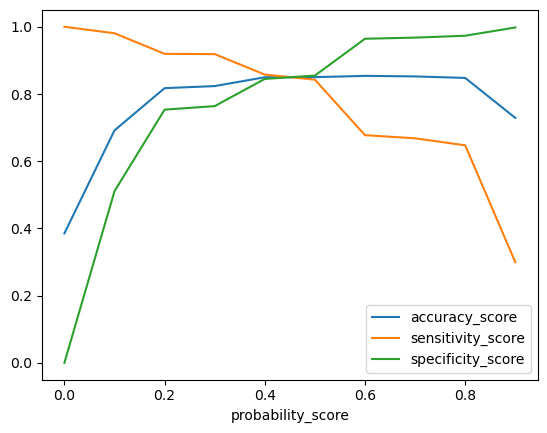

In [137]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

#### Precision Recall Tradeoff

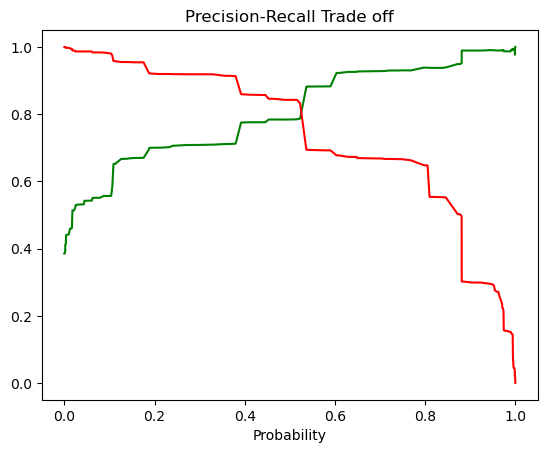

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

##### In Sensitivity-Specificity-Accuracy plot 0.42 probability looks optimal. In Precision-Recall Curve 0.5 looks optimal.

##### We are taking 0.42 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [141]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print('---Result of training data---')
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print('---Result of training data---')
    print(y_test_pred_final.head())
    
    print('---Model Evaluation Metrics---')
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [142]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.42)

---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.522745                  1          52
1         1012          0             0.025145                  0           3
2         9226          0             0.012442                  0           1
3         4750          1             0.881004                  1          88
4         7987          1             0.995570                  1         100
---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.379856                  0          38
1         1490          1             0.522745                  1          52
2         7936          0             0.379856                  0          38
3         4216          1             0.998916                  1         100
4         3830          0             0.522745                  1          52
---M

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.379856,0,38
1,1490,1,0.522745,1,52
2,7936,0,0.379856,0,38
3,4216,1,0.998916,1,100
4,3830,0,0.522745,1,52
...,...,...,...,...,...
2718,850,0,0.175578,0,18
2719,2879,0,0.003322,0,0
2720,6501,1,0.881004,1,88
2721,7155,0,0.175578,0,18


In [143]:
print("Features used in Final Model :", col)
print("="*57)
print(res.params.sort_values(ascending=False))

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')
Tags_Closed by Horizzon                          9.334976
Tags_Lost to EINS                                9.207855
Tags_Will revert after reading the email         4.157329
Tags_Busy                                        3.353539
Last Activity_Other_Last_Activity                2.409595
Lead Source_Welingak Website                     2.148682
Last Activity_Unsubscribed                       2.076098
Last Activity_SMS Sent                           1.910934
Lead

### Final Results and Conclusion

1.The logistic regression model predicts the probability of the target variable taking a certain value, rather than predicting the value of the target 
variable directly. A cutoff probability is then applied to determine the final predicted value.

2.In this analysis, the logistic regression model is used to predict the probability of customer conversion.

3.The optimum cutoff probability is determined to be 0.42. Leads with a probability greater than 0.42 are classified as Hot Leads (customers likely 
to convert), while those with a probability of 0.42 or less are classified as Cold Leads (customers unlikely to convert).

4.The final logistic regression model is built using 14 features.

5.The features included in the final model are:
       'Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'.

‘Tags_Closed by Horizzon’, 'Tags_Lost to EINS' and 'Tags_Will revert after reading the email'are obtained by encoding original categorical variable 
‘Tags’.

Tags_Closed by Horizzon (Coefficient factor = 9.334976)

Tags_Lost to EINS (Coefficient factor = 9.207855)

Tags_Will revert after reading the email (Coefficient factor = 4.157329)

The final model has Sensitivity of 0.836, this means the model is able to predict 83.6% customers out of all the converted customers, 
(Positive conversion) correctly.

The final model has Precision of 0.74, this means 74% of predicted hot leads are True Hot Leads.